In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from yolo_opencv import get_objects

In [17]:
objs = get_objects('IMG_20191030_132549.jpg', config="yolov3.cfg",
                weights="yolov3.weights",
                classes_="yolov3.txt")
image = None
for obj in objs:
    if obj[0] == 'car':
        image = obj[1]

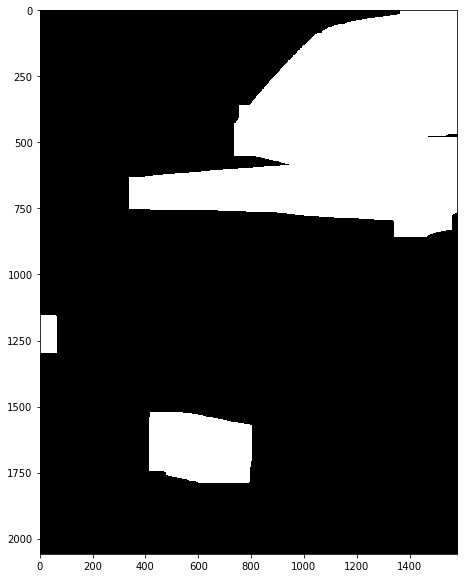

In [24]:
_,gray = cv2.threshold(image,150, 255,cv2.THRESH_BINARY)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY) #convert to grey scale
gray_orig = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grey scale

gray = cv2.bilateralFilter(gray, 11, 17, 17)

# for _ in range(1):
#     kernel = np.ones((5,5), np.uint8)
#     gray = cv2.erode(gray, kernel, iterations=5)
kernel = np.ones((5,5), np.uint8)
gray = cv2.erode(gray, kernel, iterations=1)
gray = cv2.dilate(gray, kernel, iterations=10)
gray = cv2.erode(gray, kernel, iterations=20)
gray = cv2.dilate(gray, kernel, iterations=30)

gray = cv2.bilateralFilter(gray, 15, 21, 21)
_,gray = cv2.threshold(gray,150, 255,cv2.THRESH_BINARY)

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(gray, cmap='gray')

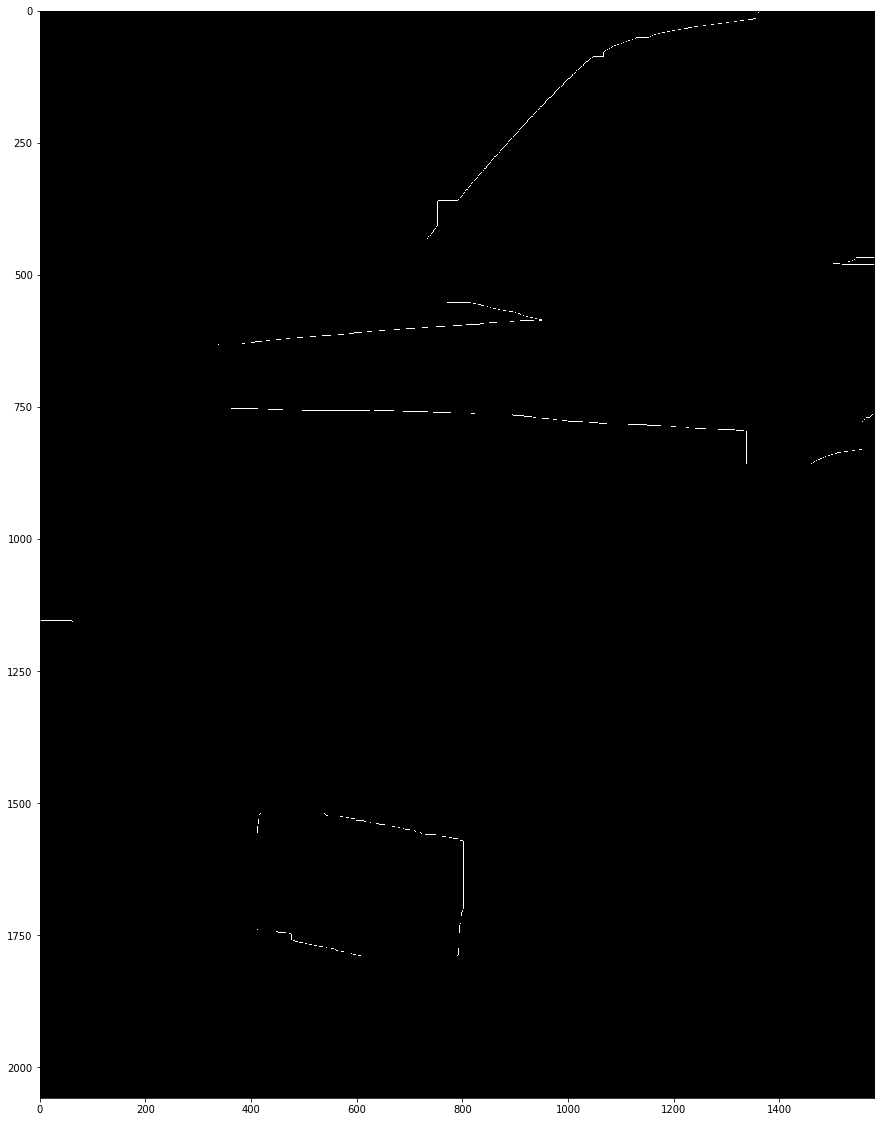

In [25]:
high_thresh, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh

edged = cv2.Canny(gray, lowThresh, high_thresh) #Perform Edge detection

fig, ax = plt.subplots(figsize=(30, 20))
ax.imshow(edged, cmap='gray')

In [26]:
_, contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

biggest_area = 0
best_candidate = None

candidates = []

i = 0
for c in contours:
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
    if len(approx) == 4:
        area = cv2.contourArea(approx)
        perimeter = cv2.contourArea(approx)
        if len(approx) == 4:
            rect = cv2.minAreaRect(approx)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            candidates.append(box)
            i = i + 1

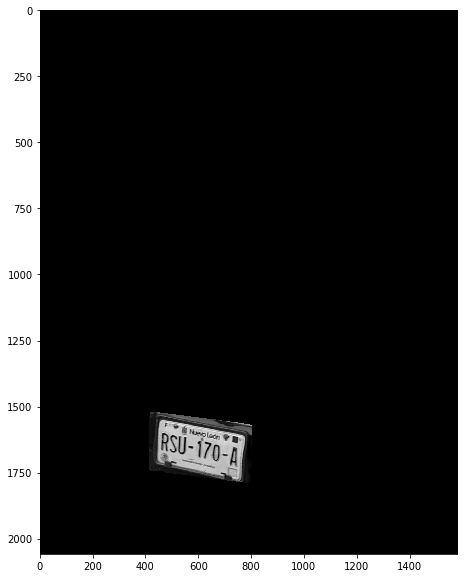

In [27]:
import numpy as np

contour_mask = np.zeros(gray.shape,np.uint8)
cv2.drawContours(contour_mask, candidates, -1, (255, 255, 255), -1)

img1_bg = cv2.bitwise_and(gray_orig,gray,mask = contour_mask)

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(img1_bg, cmap="gray")

In [28]:
(x, y) = np.where(contour_mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
cropped_img_gray = gray_orig[topx:bottomx+1, topy:bottomy+1]
cropped_img = image[topx:bottomx+1, topy:bottomy+1]

cropped_img_gray = cv2.resize(cropped_img_gray, (500, 300))
cropped_img = cv2.resize(cropped_img, (500, 300))

In [29]:
cv2.imwrite("cropped_img.png", cropped_img)
cv2.imwrite("cropped_img_gray.png", cropped_img_gray)

True